# CS 594 / CS 690 - Assignment 10
### November 5, 2018
---

For this assignment, you must work in groups of one or two students. Each person is responsible to write their own code, but the group will (together) discuss their solution.  In this notebook, we provide you with basic functions for completing the assignment.  *Complete the assignment in this notebook.  You will need to modify existing code and write new code to find a solution*.  Each member of the group must upload their own work (i.e., a notebook file) to GitHub.

*Note: Running a cell will not rerun previous cells.  If you edit code in previous cells, you must rerun those cells.  If you are having trouble with undefined errors and code changes not applying, we recommend using* `Run All` *to avoid any errors results from not rerunning previous cells.  You can find this in the menu above:* `Cell -> Run All`

This week, we are looking at an example of processing and analysing data in the domain of soil science. Soil moisture is a critical variable that links climate dynamics with water and food security. It regulates land-atmosphere interactions (e.g., via evapotranspiration - the loss of water from evaporation and plant transpiration to the atmosphere), and it is directly linked with plant productivity and survival. Information on soil moisture is important to design appropriate irrigation strategies to increase crop yield, and long-term soil moisture coupled with climate information provides insights into trends and potential agricultural thresholds and risks. Thus, information on soil moisture is a key factor to inform and enable precision agriculture.

The current availability in soil moisture data over large areas comes from remote sensing (i.e., satellites with radar sensors) which provide daily, nearly global coverage of soil moisture. However, satellite soil moisture datasets have a major shortcoming in that they are limited to coarse spatial resolution (generally no finer than 25 km).

There do exist at higher resolution other geographic datasets (e.g., climatic, geological, and topographic) that are intimately related to soil moisture values. With a group of soil scientists at the University of Delaware, we have paired soil moisture data and various topographic parameters in order to downscale (i.e., increase resolution) the originial soil moisture product.

This assignment walks through some early stages of data downscaling as a means to introduce you to a common and powerful Python package for data analysis: [Pandas](http://pandas.pydata.org/pandas-docs/version/0.23.4/index.html). The workflow consists of stages--data processing, modeling to generate fine-scale predictions, and visualization--wrapped in a Jupyter Notebook to demonstrate the sharability and reproducibility we discussed previously.

For the initial part of this assignment, we will process data in Pandas [DataFrames](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html) to prepare it for modeling. We are looking at data for the Mid Atlantic Coastal Plains, a North American ecoregion containing the state of Delaware (designated by the [Commission for Environmental Cooperation](http://www.cec.org/)). 

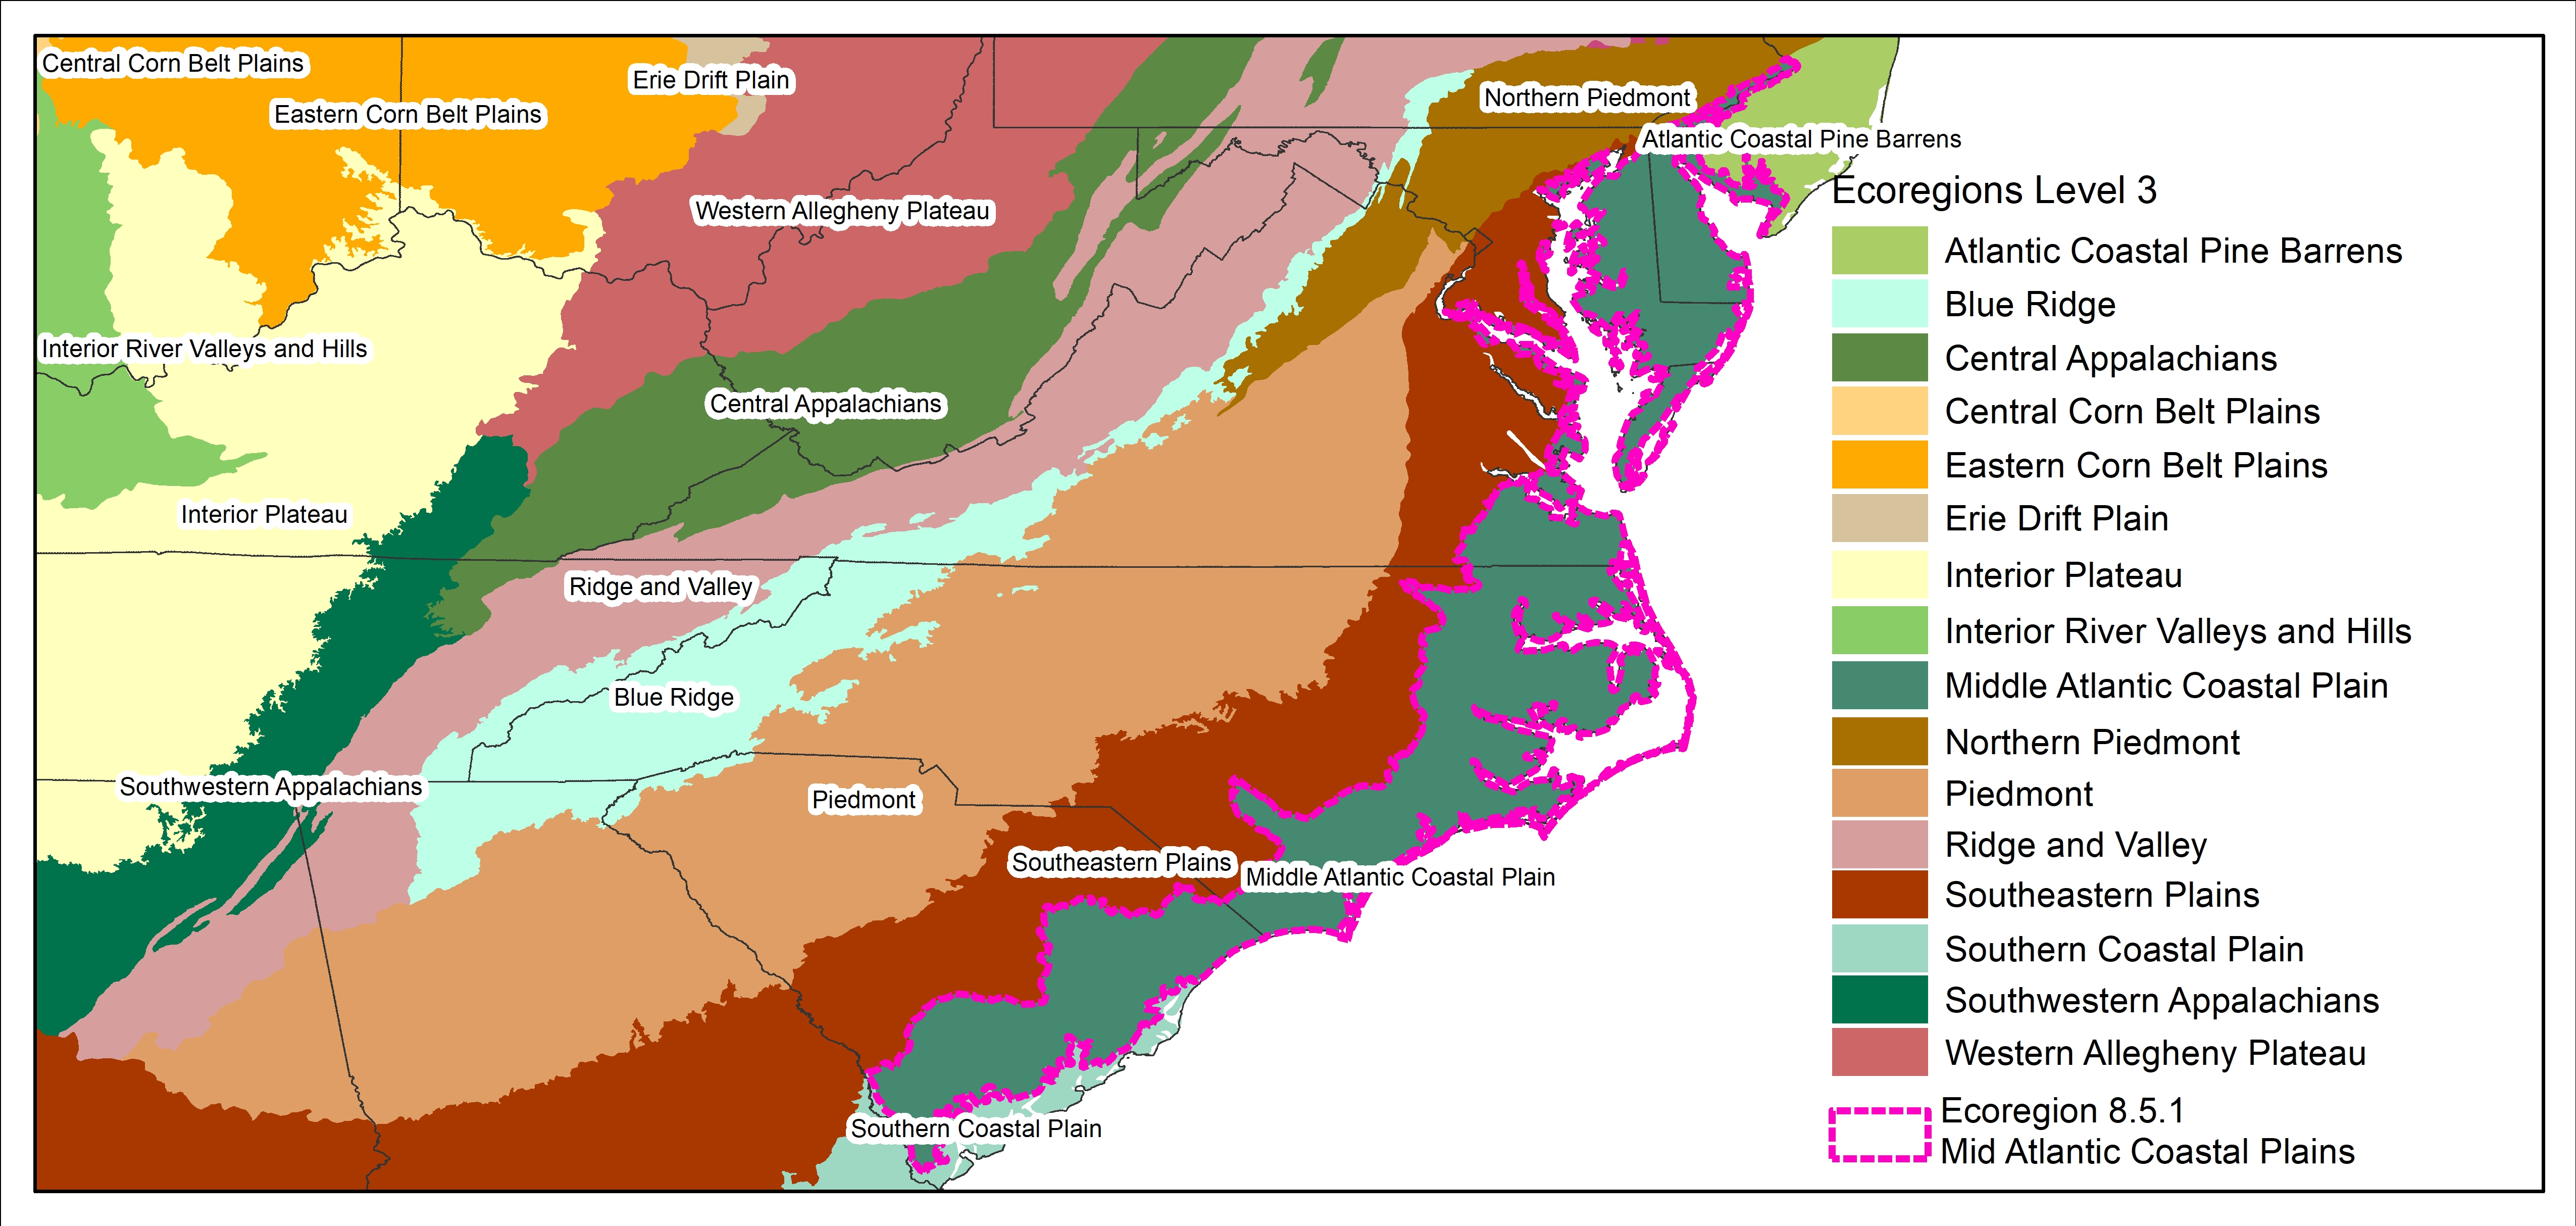

We work with a subset of data for a single year, specifically 2016. There are two comma-separated text files related to 2016 in this Assignment folder: "Delaware_train.csv" with 29 columns and "Delaware_eval.csv" with 17 columns. The initial two columns in both files are x (longitude) and y (latitude) coordinates. The final fifteen columns are static (i.e., constant over relatively short time-spans) topographic parameters. The other twelve columns of the "train" file are monthly soil moisture averages for 2016 for the approximately 27 km x 27 km pixel with centroid at the given coordinates.

For the middle part of this assignment, we will feed the processed data into a pre-prepared modeling script to produce downscaled soil moisture predictions. The coarse-resolution "train" data is used to generate a model, which is evaluated on the fine-resolution "eval" data.

For the final part of this assignment, we will take advantage of Pandas' intigration with matplotlib to create heatmats for visually comparing our downscaled soil moisture product to the original data.

Through the assignment "<--YOUR CODE HERE!-->" will be used in Code cells and "Your answer here" in Markdown cells to indicate where work is required.

In [1]:
# Import pandas and pyplot.
import pandas as pd
from matplotlib import pyplot as plt

Before we begin processing the data, we need to load in our two data files--Delaware_train.csv and Delaware_eval.csv--as DataFrames.

In [2]:
# Load soil moisture + topographic data for Delaware.
# HINT: ref [1]
train_df = pd.read_csv('Delaware_train.csv')
eval_df = pd.read_csv('Delaware_eval.csv')

# Print the type of the two objects we just created.
print(type(train_df))
print(type(eval_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


**Expected Output:**

```
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
```

**References:**
- [1: pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

### Problem 1:

The file Delaware_train.csv has a different column of soil moisture values for each month of the year, but we only want to work with one month at a time. Write a function to remove all monthly columns from a given dataframe except for a specified month.

In [3]:
# First, let's write a function that replaces the month strings with integers.
# Arguments: Dataframe df
# Returns: Dataframe
# HINT: ref [1]
def months_to_ints(df):
    month_dict = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, 
                  "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
    df.rename(index=str, columns=month_dict, inplace=True)
    return df
    #return <--YOUR CODE HERE!-->

# Now we need a function that drops all integer-headed columns except the specified integer.
# Arguments: DataFrame df, int n
# Returns: DataFrame
# HINT: ref [2]
def keep_month(df, n):
    df = months_to_ints(df)
    list_m = [1,2,3,4,5,6,7,8,9,10,11,12]
    list_m.remove(n)
    df = df.drop(list_m, axis = 1)
    return df


Nowo use the above function to select the data for November (the 11th month). Print the first few rows of `train_df` before and after using `keep_month(train_df, 11)` to make sure your function works as desired.

In [4]:
# Print the first three rows of train_df before and after using keep_month(train_df, 11).
# HINT: ref [3]
print(train_df.head(3))
train_df = keep_month(train_df, 11)
print(train_df.head(3))

        x       y  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug    ...      \
0 -81.375  40.125  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...       
1 -81.125  40.125  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...       
2 -80.875  40.125  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...       

              LC     CI        CD        FA       TWI  LSF       CNB  \
0    3522.441162  302.0  3.313673  0.421390  2.226725  NaN  1.570095   
1  149035.718750  329.0  3.967493  0.463471  1.473294  NaN  1.570472   
2  -96238.695312  340.0  2.943997  0.516611  1.976459  NaN  1.570441   

         VDC             VD        RSP  
0  16.155762  -30332.597656 -12.441601  
1  45.892578    3879.914307 -12.312553  
2  91.629883 -223536.406250 -13.712075  

[3 rows x 29 columns]
        x       y  11       DEM      HILL         SLP        ASP        CSC  \
0 -81.375  40.125 NaN  2.886410  0.000104  290.234070  11.765930  -0.471792   
1 -81.125  40.125 NaN  4.065019  0.000156  289.356567  39.643433  30.551517  

**Expected Output:**

```
        x       y  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug    ...      \
0 -81.375  40.125  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...       
1 -81.125  40.125  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...       
2 -80.875  40.125  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...       

              LC     CI        CD        FA       TWI  LSF       CNB  \
0    3522.441162  302.0  3.313673  0.421390  2.226725  NaN  1.570095   
1  149035.718750  329.0  3.967493  0.463471  1.473294  NaN  1.570472   
2  -96238.695312  340.0  2.943997  0.516611  1.976459  NaN  1.570441   

         VDC             VD        RSP  
0  16.155762  -30332.597656 -12.441601  
1  45.892578    3879.914307 -12.312553  
2  91.629883 -223536.406250 -13.712075  

[3 rows x 29 columns]
        x       y  11       DEM      HILL         SLP        ASP        CSC  \
0 -81.375  40.125 NaN  2.886410  0.000104  290.234070  11.765930  -0.471792   
1 -81.125  40.125 NaN  4.065019  0.000156  289.356567  39.643433  30.551517   
2 -80.875  40.125 NaN  3.334804  0.000076  242.072678  97.927322  -5.045915   

              LC     CI        CD        FA       TWI  LSF       CNB  \
0    3522.441162  302.0  3.313673  0.421390  2.226725  NaN  1.570095   
1  149035.718750  329.0  3.967493  0.463471  1.473294  NaN  1.570472   
2  -96238.695312  340.0  2.943997  0.516611  1.976459  NaN  1.570441   

         VDC             VD        RSP  
0  16.155762  -30332.597656 -12.441601  
1  45.892578    3879.914307 -12.312553  
2  91.629883 -223536.406250 -13.712075 
```

**References:**
- [1: DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)
- [2: DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
- [3: DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)

### Problem 2:

Let's deal with the NAs in our data. One option is to use the `na_values`, `keep_default_na`, or `na_filter` arguments in `.read_csv()` above. For this assignment, we will use methods for DataFrames that are already in memory. 

First write code to print the number of rows in each DataFrame and the number of non-NA entries in each column.

In [5]:
# How many total rows are in our `train_df` and `eval_df` DataFrames?
# Hint: ref [1]

print("Number of rows in train_df: ", train_df.shape[0])
print("Number of rows in eval_df: ", eval_df.shape[0])

# Print the number of non-NA entries in each column of both DataFrames.
# HINT: ref [2,3]

print("Non-NA entries in columns of train_df:\n",train_df.count().to_frame().T)
print("Non-NA entries in columns of train_df:\n",eval_df.count().to_frame().T)


Number of rows in train_df:  924
Number of rows in eval_df:  43342
Non-NA entries in columns of train_df:
      x    y   11  DEM  HILL  SLP  ASP  CSC   LC   CI   CD   FA  TWI  LSF  CNB  \
0  924  924  112  604   604  604  604  604  604  604  604  602  604  106  604   

   VDC   VD  RSP  
0  602  604  604  
Non-NA entries in columns of train_df:
        x      y    DEM   HILL    SLP    ASP    CSC     LC     CI     CD  \
0  43342  43342  43342  43342  43342  43342  43342  43342  43342  43342   

      FA    TWI    LSF    CNB    VDC     VD    RSP  
0  43342  43342  43342  43342  43342  43342  43342  


**Expected Output:**

```
Number of rows in train_df: 924
Number of rows in eval_df: 43342
Non-NA entries in columns of train_df:
     x    y   11  DEM  HILL  SLP  ASP  CSC   LC   CI   CD   FA  TWI  LSF  CNB  \
0  924  924  112  604   604  604  604  604  604  604  604  602  604  106  604   

   VDC   VD  RSP  
0  602  604  604  
Non-NA entries in columns of eval_df:
       x      y    DEM   HILL    SLP    ASP    CSC     LC     CI     CD  \
0  43342  43342  43342  43342  43342  43342  43342  43342  43342  43342   

      FA    TWI    LSF    CNB    VDC     VD    RSP  
0  43342  43342  43342  43342  43342  43342  43342  
```

The DataFrame `eval_df` has no NA values; they were already taken care of in this file. But the column "LSF" of `train_df` has NAs in most of the rows. We asked our soil scientist collaborators and they informed us that this is a consequence of the land being on or near the coast-line and how the parameter is calculated, but that the correct costal value for "LSF" is 0. Therefore, let us replace the NAs in that column with 0s.

In [6]:
# Replace the NAs in column "LSF" with the value 0.
# HINT: ref [4]
train_df = train_df.fillna({'LSF':0})

eval_df = eval_df.fillna(0)


Note how most of the Soil Moisture values for November (column 11) are missing. In our assignment, we drop the rows that have an NA in that column.

In [8]:
# Drop every row that has an NA is the column with label 11.
# HINT: ref [5]
train_df = train_df.dropna(subset=[11],how='any') 

# Now print the number of rows in train_df and the number of NAs in each column again.
print("Number of rows in train_df: ", train_df.shape[0])
print("Non-NA entries in columns of train_df:\n",train_df.count().to_frame().T)



Number of rows in train_df:  112
Non-NA entries in columns of train_df:
      x    y   11  DEM  HILL  SLP  ASP  CSC   LC   CI   CD   FA  TWI  LSF  CNB  \
0  112  112  112  109   109  109  109  109  109  109  109  109  109  112  109   

   VDC   VD  RSP  
0  109  109  109  


**Expected Output:**

```
Number of rows in train_df: 112
Non-NA entries in columns of train_df:
     x    y   11  DEM  HILL  SLP  ASP  CSC   LC   CI   CD   FA  TWI  LSF  CNB  \
0  112  112  112  109   109  109  109  109  109  109  109  109  109  112  109   

   VDC   VD  RSP  
0  109  109  109 
```

It looks like there are three rows for which most of the other data is missing. The function `.dropna()` that you used above has a `thresh` option that sets a threshold for the minimum number of NAs in a row required to drop it. Use `thresh=11` and see if that removes three rows.

In [9]:
# Drop every row that has at least 11 NAs.
train_df = train_df.dropna (thresh = 11)

# Now print the number of rows in train_df and the number of NAs in each column again.
print("Number of rows in train_df: ", train_df.shape[0])
print("Non-NA entries in columns of train_df:\n",train_df.count().to_frame().T)



Number of rows in train_df:  109
Non-NA entries in columns of train_df:
      x    y   11  DEM  HILL  SLP  ASP  CSC   LC   CI   CD   FA  TWI  LSF  CNB  \
0  109  109  109  109   109  109  109  109  109  109  109  109  109  109  109   

   VDC   VD  RSP  
0  109  109  109  


**Expected Output:**

```
Number of rows in train_df: 109
Non-NA entries in columns of train_df:
     x    y   11  DEM  HILL  SLP  ASP  CSC   LC   CI   CD   FA  TWI  LSF  CNB  \
0  109  109  109  109   109  109  109  109  109  109  109  109  109  109  109   

   VDC   VD  RSP  
0  109  109  109  
```

**References:**
- [1: DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html)
- [2: DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
- [3: DataFrame.transpose](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html)
- [4: DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
- [5: DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

**Why did we wait until after month selection to drop rows with NAs instead of using an argument to drop them when the file was first loaded in?**

*Your answers here*

### Problem 3

In the paper of Rorabaugh and co-authors, three methods--kNN (k nearest-neighbors), HYPPO, or SBM (surrogate-based modeling)--for the predictions. Because we used Panda DataFrames to preprocess the data, our next step is to extract the data from our DataFrames.

In [12]:
# Extract each datasets from train_df and eval_df to Numpy ndarray.
# (Leave behind the row indices and column headers for now.)
# HINT: ref [1]
train_data = train_df.values
eval_data = eval_df.values

For our predictions, we use KNN (the base method in the paper of Rorabaugh et al.). Run it below on your train and eval data. If you get an error, then something may need fixing in a previous cell.

In [13]:
# Import the main() function from modeling.py as knn(), since KNN is its default use.
from modeling import main as knn

pred_data = knn(train_data, eval_data)

In [14]:
# Create a Pandas DataFrame with the results.
# Use the following array for the column headers.
verbose_cols = ["Longitude", "Latitude", "Soil Moisture"]
pred_df = pd.DataFrame(pred_data, columns = verbose_cols)

# Now print the top five rows to check your work.
print(pred_df.head(5))

   Longitude   Latitude  Soil Moisture
0 -74.770834  40.212499       0.238984
1 -74.762500  40.204166       0.238984
2 -74.770834  40.195833       0.238984
3 -74.762500  40.195833       0.238984
4 -74.779167  40.187499       0.238984


**Expected Output:**

```
   Longitude   Latitude  Soil Moisture
0 -74.770834  40.212499       0.238984
1 -74.762500  40.204166       0.238984
2 -74.770834  40.195833       0.238984
3 -74.762500  40.195833       0.238984
4 -74.779167  40.187499       0.238984
```

**References:**
- [1: DataFrame.values]()


### Problem 4

In the last step of the assignment we create heatmaps for the training and prediction soil moisture values. We can use the scatterplot functionality built into DataFrames, which creates a `matplotlib.pyplot` (imported as `plt` above) plot.

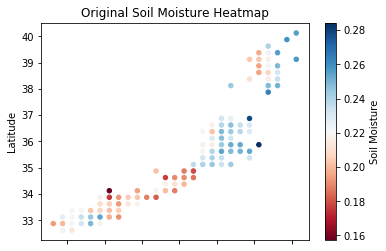

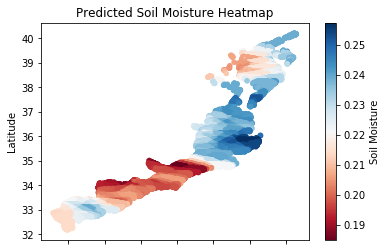

In [20]:
# First, make a DataFrame with just the first three columns of train_df.
orig_df = train_df.iloc[:, [0,1,2]]

# Rename the columns to match the columns of pred_df.
orig_df.columns = ["Longitude", "Latitude", "Soil Moisture"]

# Make scatterplots for orig_df and pred_df.
# You will want different point sizes and titles, but the rest of the arguments can be the same.
# The same min and max soil values must be specified to assure both plots have the same color scheme.
# We'll provide the colormap.
# HINT: ref [1]

def plot(df, title):    
    sm_cmap = plt.cm.get_cmap('RdBu')
    ax = df.plot.scatter(x = 'Longitude', y = "Latitude", c= "Soil Moisture", colormap=sm_cmap)
    ax.set_ylabel("Latitude")
    ax.set_title(title)
    plt.show()
    plt.clf()
    
plot(orig_df, "Original Soil Moisture Heatmap")
plot(pred_df, "Predicted Soil Moisture Heatmap")

**Approximate Expected Output:**
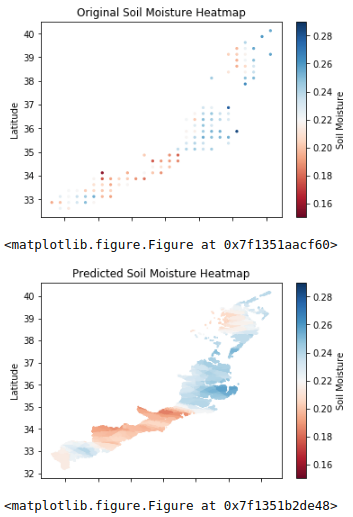

**References:**
- [1: DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)


### Things to Consider:
* Simply replacing each NA in the LSF column with 0 was a potentially careless move. LSF is a non-negative value and the the coarse resolution of the original data may result in pixels that are touching the coast but consist of predominantly noncostal land at a finer scale. Consequently, the average value of LSF across this area is plausibly nontrivially positive. **Every data processing step must be carefully defended.**
* `DataFrame.plot.scatter` produces plots that are automatically labeled with the dataframes `columns` but the labels are missing from the horizontal axis. What is causing this bug?
* Having downscaled the soil moisture data for a region, how might we validate the results?

### Assignment Questions:
**Answer the following questions, in a couple sentences each, in the cells provided below**
* List the key tasks you accomplished during this assignment?
* Describe the challenges you faced in addressing these tasks and how you overcame these challenges?
* Did you work with other students on this assignment? If yes, how did you help them? How did they help you? Be as specific as possible.

*Your answers here*

### Project Questions:

**Motivation**
Describe the motivation of your work. To build the motivation, you can answer these questions:
* What is the problem you are tackling? 
* How is the problem solved today?

Write a paragraph of 200 - 300 words.

*Your answer here*

**Contributions**
List between 2 and 4 contributions of your work. Contributions are bullet points that define your solution. E.g., 
* We build a system that .... 
* We validate the system accuracy by .... 
* We measure the performance of the system by ... 

Write a section of 150 - 200 words.

*Your answer here*

**Tests**
List the type of tests (measurements) you will perform. E.g.,
* What are your metrics of success? 
* Where do you run your tests? 
* What tests do you perform? 
* How many times do you run each test? 
* What do you measure? 

Write a section of 250 - 350 words.

*Your answer here*

**Slides** 
Keep updating your slides. Submit a new version together with Assignment 10.